## What is allowed during the exam

- You are allowed to use your own notes, electronic or hard copy, as long as they are your own original notes and not just copies of other sources.
- You are allowed to use all course content posted in Canvas without citation.
- You are allowed to use the internet and consult outside resources.  However, you must CITE any outside resources that you consult and include references.  Also, consulting is not copying.  Your can consult and cite references, but your work must be original. Moreover, copying material - including computer code - from outside sources is plagiarism.
- In particular, **if you consult any websites outside of Canvas or the course Colab notebooks, be sure to site those websites by providing the link.**

## What is NOT allowed during the exam

- You are NOT allowed to post questions to internet websites, such as (but not limited to) Chegg.com.
- You are NOT allowed to post questions from assignments to any AI, such as (but not limited to) ChatGPT or GPT-4.
- You are NOT allowed to copy material from outside sources.  Your can consult sources, but you must CITE any sources that you consult and include references.  Moreover, copying material - including computer code - from outside sources is plagiarism.
- You are NOT allowed to communicate with anyone during exams.
- You are NOT allowed to use any devices except for the desktop computers (unless you have DRC accommodations that you have discussed with me).

One example: you are allowed to use Google to find the documentation for a Pandas function to see what arguments are available, but you need to cite the websites you visit. You are NOT allowed to ask Google or AI or whatever to write the code for you.

**If you are not sure if something is allowed, ASK ME before doing it.**

## Instructions and Notes

Save a copy of this notebook to your Google Drive.

Some of the questions might seem open-ended. Several answers might be acceptable, but you need to justify your approach and answer. Think, but do not overthink. If a simple answer is sufficient, you do not get any bonus points --- and you might even lose credit --- for making the problem more complicated than it needs to be.

You should answer these questions based on methods we have seen in this course. Almost all (if not all) of your code should be commands we have seen in class. If you find yourself writing for loops or long blocks or code or using functions with lambdas or Googling to find new commands that we haven't used, then you might not receive any credit for your work even if it is correct.

You do not need to use scikit-learn for any problems on this exam. You can if you want, provided that it is something that we have covered in class.

If you cannot get your code to work, or it's working but you think it's incorrect, explain in words the process you are trying to implement. You might get some partial credit if you describe the process correctly even if you can't implement it with code.

Be careful about the order in which you run cells and save objects. You will need to Restart and Run all before submitting, so be sure that your code will continue to work when you do this.

Submission instructions are at the end. Be sure to save a few minutes at the end to Run All and submit your files to Canvas.

**Good luck!!!**

## Data for Problems 1 through 3


The [Consumer Expenditure Survey](https://www.bls.gov/cex/) is conducted by the U.S. Census Bureau for the U.S. Bureau of Labor Statistics. It contains data on "consumer units" (CU) in the U.S. For the purposes of this exam, you can think of a consumer unit as a household (though a [consumer unit](https://www.bls.gov/opub/hom/cex/concepts.htm) is a little more complicated than that).

Problems 1 through 3 involve data from the 2019 Consumer Expenditure Survey. The data set located at https://raw.githubusercontent.com/kevindavisross/data301/main/data/CEdata.csv contains information on these variables for the consumer units in the survey.


- "Rural": 1 if the CU is in a rural area; 0 otherwise.

- "Income": CU income before taxes in past 12 months (in USD).

- "Race": only coded as one of the following 1 = White, 2 = Black, 3 = Native American, 4 = Asian, 5 = Pacific Islander, 6 = Multi-race.

- "Expenditure": CU total expenditures in the last quarter (in USD).

- "Kids": the number of CU members under age 16.

## Problem 1 (2 points each)

No explanation is necessary for Problem 1.

a) Read in the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# ENTER YOUR CODE HERE
df_con = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/CEdata.csv")
df_con.head()

,ID,Rural,Income,Race,Expenditure,Kids
0,1000001,0,73720,1,27542.0001,3
1,1000002,0,12000,1,7415.5000,2
2,1000003,0,20000,1,8607.5001,0
3,1000004,0,130500,1,20430.2500,0
4,1000005,0,99000,2,10095.1499,0


b) Exclude all CEs with income less than 10000. Equivalently, only include CEs with Income of at least 10000. Note: you will exclude CEs with income less than 10000 from all analysis.

In [3]:
# ENTER YOUR CODE HERE
df_con = df_con[df_con['Income'] >= 10000]
df_con.head()

,ID,Rural,Income,Race,Expenditure,Kids
0,1000001,0,73720,1,27542.0001,3
1,1000002,0,12000,1,7415.5000,2
2,1000003,0,20000,1,8607.5001,0
3,1000004,0,130500,1,20430.2500,0
4,1000005,0,99000,2,10095.1499,0


c) Replace the numerical codes in the Race column with the text they represent, e.g., replace 1 with White. Don't create a new column; overwrite the original Race column.

In [4]:
# ENTER YOUR CODE HERE
# 1 = White, 2 = Black, 3 = Native American, 4 = Asian, 5 = Pacific Islander, 6 = Multi-race
df_con["Race"] = df_con["Race"].map({
    1: "White",
    2: "Black",
    3: "Native American",
    4: "Asian",
    5: "Pacific Islander",
    6: "Multi-race"
})

In [5]:

df_con["Race"].value_counts()

White               3825
Black                460
Asian                212
Multi-race            76
Native American       26
Pacific Islander      21
Name: Race, dtype: int64

d) Create a new column called "KidsCat" that categorizes Kids as 0, 1, 2, 3, or 4+.

In [6]:
# ENTER YOUR CODE HERE
def cat(c):
  if c == 0 or c == 1 or c == 2 or c == 3:
    return str(c)
  else:
    return "4+"

df_con["KidsCat"] = df_con["Kids"].map(cat)

In [7]:
df_con["KidsCat"].value_counts()

0     3340
1      556
2      468
3      179
4+      77
Name: KidsCat, dtype: int64

e) Create new columns for the logarithm of Income and the logarithm of Expenditure

In [8]:
# ENTER YOUR CODE HERE
df_con["log_Income"] = np.log(df_con["Income"])
df_con["log_Expenditure"] = np.log(df_con["Expenditure"])

In [9]:
df_con.head()

,ID,Rural,Income,Race,Expenditure,Kids,KidsCat,log_Income,log_Expenditure
0,1000001,0,73720,White,27542.0001,3,3,11.208029,10.223467
1,1000002,0,12000,White,7415.5000,2,2,9.392662,8.911328
2,1000003,0,20000,White,8607.5001,0,0,9.903488,9.060389
3,1000004,0,130500,White,20430.2500,0,0,11.779129,9.924772
4,1000005,0,99000,Black,10095.1499,0,0,11.502875,9.219810


f) Create a new column for Expenditures as a Percentage of Income. Note that Income is for 12 months, while Expenditures is for 3 months.

In [10]:
# ENTER YOUR CODE HEREr
df_con["%_Expenditure"] = ((df_con['Expenditure']) / (df_con['Income'])) * 100
df_con

,ID,Rural,Income,Race,Expenditure,Kids,KidsCat,log_Income,log_Expenditure,%_Expenditure
0,1000001,0,73720,White,27542.0001,3,3,11.208029,10.223467,37.360282
1,1000002,0,12000,White,7415.5000,2,2,9.392662,8.911328,61.795833
2,1000003,0,20000,White,8607.5001,0,0,9.903488,9.060389,43.037501
3,1000004,0,130500,White,20430.2500,0,0,11.779129,9.924772,15.655364
4,1000005,0,99000,Black,10095.1499,0,0,11.502875,9.219810,10.197121
...,...,...,...,...,...,...,...,...,...,...
5128,1005129,0,37080,White,2721.3333,0,0,10.520833,7.908877,7.339087
5129,1005130,0,12368,Black,1398.1333,0,0,9.422868,7.242893,11.304441
5130,1005131,0,157560,White,7056.0944,0,0,11.967562,8.861647,4.478354
5131,1005132,1,15000,Black,4454.5667,1,1,9.615805,8.401685,29.697111


## Problem 2 (4 points each)

Use the data set resulting from Problem 1 to answer the following questions.

a) Summarize the distribution of KidsCat. Your answer to this question should be based on both appropriate numerical values and an appropriate graphic.

In [11]:
df_con["KidsCat"].value_counts(normalize=True)

0     0.722944
1     0.120346
2     0.101299
3     0.038745
4+    0.016667
Name: KidsCat, dtype: float64

<Axes: title={'center': 'Distribution of KidsCat'}, xlabel='KidsCat', ylabel='Freq. Count'>

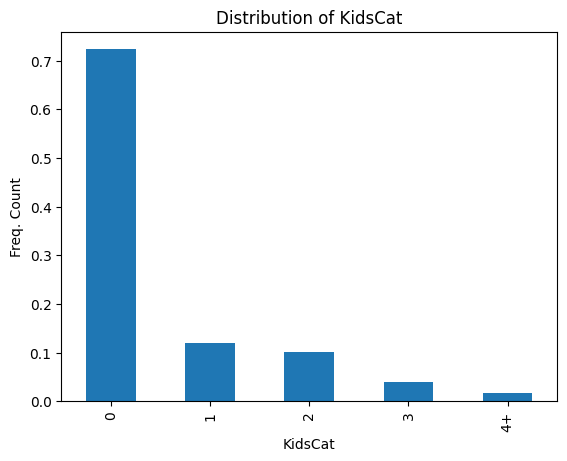

In [12]:
# ENTER YOUR CODE HERE
df_con["KidsCat"].value_counts(normalize=True).plot.bar(xlabel = "KidsCat", ylabel="Freq. Count", title="Distribution of KidsCat")

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

From the plot it seems that there are more with no kids under 16 in this dataset. And the least would be having 4+ kids under 16.

b) Create a plot that displays the proportion of CUs living in rural areas for each value of KidsCat.

<Axes: title={'center': 'Proportion of CUs living in Rural Areas for KidsCat'}, xlabel='KidsCat', ylabel='Proportion'>

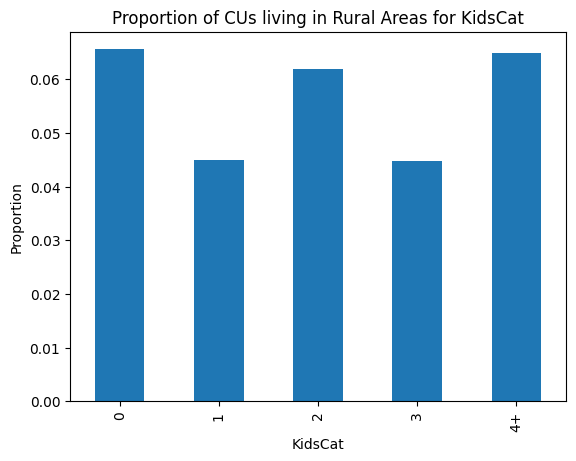

In [13]:
# ENTER YOUR CODE HERE
df_con.groupby("KidsCat")["Rural"].mean().plot.bar(xlabel = "KidsCat", ylabel="Proportion", title="Proportion of CUs living in Rural Areas for KidsCat")

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

From the plot it can be seen that there is higher proportion of units having nokids under age of 16 that are living in Rural areas. However this is also similar to having 4+ kids living in Rural areas.

c) Create a two-way table that summarizes the joint distribution of Race and KidsCat. Then write a clearly worded sentence interpreting the value corresponding to White and 0 in context.

In [14]:
# ENTER YOUR CODE HERE
joint_Race_KidsCat = pd.crosstab(df_con["Race"], df_con["KidsCat"],
                                    normalize=True)
joint_Race_KidsCat

KidsCat,0,1,2,3,4+
Race,,,,,
Asian,0.026407,0.007576,0.009740,0.002165,0.000000
Black,0.068182,0.016883,0.007576,0.005844,0.001082
Multi-race,0.012121,0.002381,0.001515,0.000216,0.000216
Native American,0.002814,0.001732,0.000649,0.000216,0.000216
Pacific Islander,0.002597,0.001299,0.000649,0.000000,0.000000
White,0.610823,0.090476,0.081169,0.030303,0.015152


**TYPE YOUR EXPLANATION/RESPONSE HERE.**

From the two-way table, white-0 value shows how race interacts with the KidsCat variable. So here it shows that being white and having no kids under the age of 16 has a strong influence on each other.

d) Create an appropriate graphic that displays the conditional distribution of KidsCat for each Race. Then write a clearly worded sentence interpreting the value corresponding to 0 and White in context. (It's fine if you just read the value from your graphic as best as you can; the graph and the interpretation of the value are what's important. But you can also compute the value if you want.)

In [15]:
# ENTER YOUR CODE HERE
marginal_KidsCat_Race = joint_Race_KidsCat.sum(axis=1)
marginal_KidsCat_Race

Race
Asian               0.045887
Black               0.099567
Multi-race          0.016450
Native American     0.005628
Pacific Islander    0.004545
White               0.827922
dtype: float64

In [16]:
cond_KidsCat_Race = joint_Race_KidsCat.divide(marginal_KidsCat_Race, axis=0)
cond_KidsCat_Race

KidsCat,0,1,2,3,4+
Race,,,,,
Asian,0.575472,0.165094,0.212264,0.047170,0.000000
Black,0.684783,0.169565,0.076087,0.058696,0.010870
Multi-race,0.736842,0.144737,0.092105,0.013158,0.013158
Native American,0.500000,0.307692,0.115385,0.038462,0.038462
Pacific Islander,0.571429,0.285714,0.142857,0.000000,0.000000
White,0.737778,0.109281,0.098039,0.036601,0.018301


<Axes: xlabel='Race'>

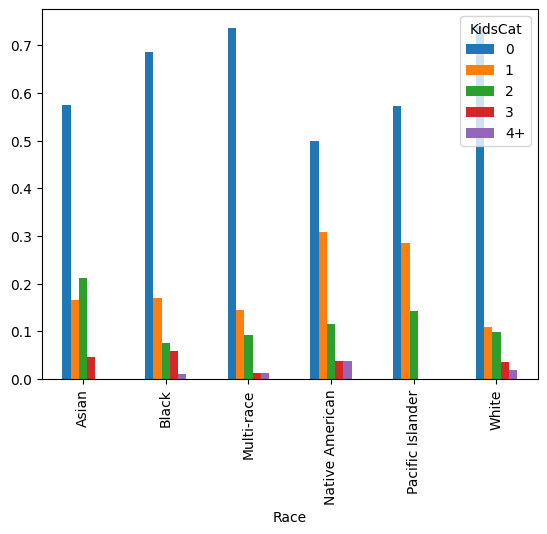

In [17]:
cond_KidsCat_Race.plot.bar()

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

From this plot and the data, it can be seen that there is a 0.73 chance of being white having no kids under the age of 16.

e) Compare the distribution of the logarithm of Expenditures across the values of KidsCat. Your answer to this question should be based on both appropriate numerical values and an appropriate graphic.

In [18]:
# ENTER YOUR CODE HERE
dist_e = df_con.groupby("KidsCat")["log_Expenditure"].value_counts()
dist_e

KidsCat  log_Expenditure
0        7.707063           3
         7.307761           2
         7.638198           2
         7.663408           2
         7.757336           2
                           ..
4+       10.293272          1
         10.411712          1
         10.706022          1
         11.056348          1
         11.079782          1
Name: log_Expenditure, Length: 4592, dtype: int64

In [19]:
import matplotlib.pyplot as plt

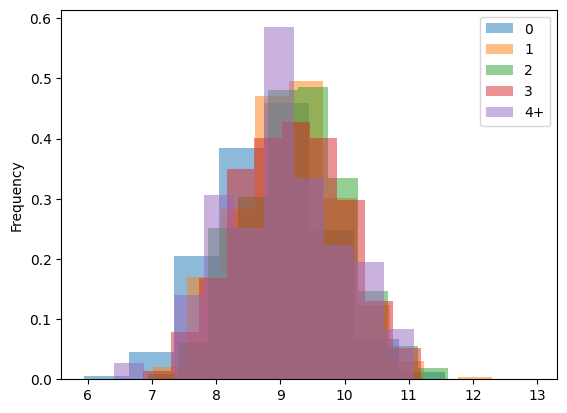

In [20]:
df_con[df_con["KidsCat"] == "0"]["log_Expenditure"].plot.hist(density=True, alpha=0.5, legend=True)
df_con[df_con["KidsCat"] == "1"]["log_Expenditure"].plot.hist(density=True, alpha=0.5, legend=True)
df_con[df_con["KidsCat"] == "2"]["log_Expenditure"].plot.hist(density=True, alpha=0.5, legend=True)
df_con[df_con["KidsCat"] == "3"]["log_Expenditure"].plot.hist(density=True, alpha=0.5, legend=True)
df_con[df_con["KidsCat"] == "4+"]["log_Expenditure"].plot.hist(density=True, alpha=0.5, legend=True)
plt.legend(["0", "1", "2", "3", "4+"])

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

From the distrubutions and the data, it can be seen that most of the cateogires are symmetric with hving 4+ kids being the highest to the mean of the distribution.

f) For which Race is the relationship between logarithm of Income and logarithm of Expenditure the strongest? Your answer to this question should be based on both appropriate numerical values and an appropriate graphic.

In [21]:
# ENTER YOUR CODE HERE
graphic_f = df_con.groupby("Race")[["log_Income", "log_Expenditure"]].corr()
graphic_f

log_Income  log_Expenditure
Race                                                         
Asian            log_Income         1.000000         0.626673
                 log_Expenditure    0.626673         1.000000
Black            log_Income         1.000000         0.562931
                 log_Expenditure    0.562931         1.000000
Multi-race       log_Income         1.000000         0.578301
                 log_Expenditure    0.578301         1.000000
Native American  log_Income         1.000000         0.637757
                 log_Expenditure    0.637757         1.000000
Pacific Islander log_Income         1.000000         0.706964
                 log_Expenditure    0.706964         1.000000
White            log_Income         1.000000         0.585737
                 log_Expenditure    0.585737         1.000000

In [22]:
import altair as alt

In [23]:
alt.Chart(df_con).mark_point().encode(
    x="log_Income",
    y="log_Expenditure",
    facet="Race"
)

alt.Chart(...)

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

The race with the strongest relationship would be Pacific Islander with correlation between log of income and log of expenditures at 0.7

g) Among CUs in non-rural areas only, for which category of KidsCat does Expenditure as a percent of Income tend to be the highest? Your answer to this question should be based on both appropriate numerical values and an appropriate graphic.

In [24]:
# ENTER YOUR CODE HERE
df_rural = df_con[df_con["Rural"] == 0]
df_rural


,ID,Rural,Income,Race,Expenditure,Kids,KidsCat,log_Income,log_Expenditure,%_Expenditure
0,1000001,0,73720,White,27542.0001,3,3,11.208029,10.223467,37.360282
1,1000002,0,12000,White,7415.5000,2,2,9.392662,8.911328,61.795833
2,1000003,0,20000,White,8607.5001,0,0,9.903488,9.060389,43.037501
3,1000004,0,130500,White,20430.2500,0,0,11.779129,9.924772,15.655364
4,1000005,0,99000,Black,10095.1499,0,0,11.502875,9.219810,10.197121
...,...,...,...,...,...,...,...,...,...,...
5127,1005128,0,50900,White,1740.2500,0,0,10.837618,7.461784,3.418959
5128,1005129,0,37080,White,2721.3333,0,0,10.520833,7.908877,7.339087
5129,1005130,0,12368,Black,1398.1333,0,0,9.422868,7.242893,11.304441
5130,1005131,0,157560,White,7056.0944,0,0,11.967562,8.861647,4.478354


In [25]:
graphic_g = df_rural.groupby("KidsCat")["log_Expenditure"].mean()
graphic_g

KidsCat
0     8.848219
1     9.140753
2     9.259637
3     9.160704
4+    9.121597
Name: log_Expenditure, dtype: float64

<Axes: xlabel='KidsCat'>

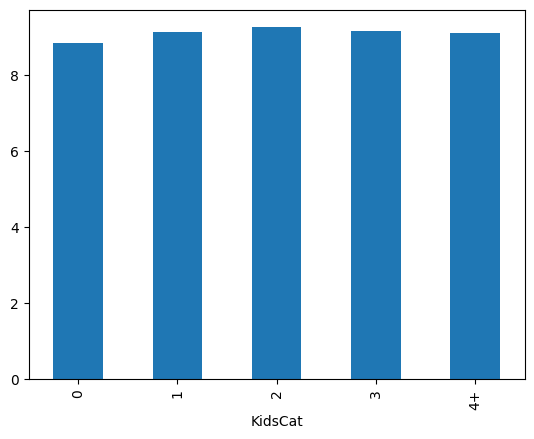

In [26]:
graphic_g.plot.bar()

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

The percent income tends to  be highest for having 2 kids under the age of 16 among those living in non-rural areas.

h) Create a new Pandas DataFrame containing only CUs 100678, 1001234, and 1001989 and only the columns that you added to the data set (excluding the relabeling of Race). No explanation necessary for this part.

In [27]:
# ENTER YOUR CODE HERE
df_specific = df_con[(df_con["ID"] == 1000678) | (df_con["ID"] == 1001234) | (df_con["ID"] == 1001989)]
df_specific2 = df_specific[["KidsCat", "log_Income", "log_Expenditure", "%_Expenditure"]]

In [28]:
df_con.columns

Index(['ID', 'Rural', 'Income', 'Race', 'Expenditure', 'Kids', 'KidsCat',
       'log_Income', 'log_Expenditure', '%_Expenditure'],
      dtype='object')

In [29]:
df_specific2

,KidsCat,log_Income,log_Expenditure,%_Expenditure
677,1,10.703739,8.623473,12.489705
1233,3,10.757903,9.484124,27.977234
1988,3,11.891362,8.954463,5.302991


## Problem 3 (10 points)

CU 1000001 is hoping to learn some money-saving tips from similar CUs with lower expenditures. After making appropriate considerations, which CU do you think it would be best for CU 100001 to meet? Be sure to explain in detail your approach to answering this question, including any choices that you make.

In [30]:
# ENTER YOUR CODE HERE. YOU SHOULD ADD CODE CELLS AS NEEDED
df_con2 = df_con[["Rural", "Income", "Race", "KidsCat"]]
df_con2


,Rural,Income,Race,KidsCat
0,0,73720,White,3
1,0,12000,White,2
2,0,20000,White,0
3,0,130500,White,0
4,0,99000,Black,0
...,...,...,...,...
5128,0,37080,White,0
5129,0,12368,Black,0
5130,0,157560,White,0
5131,1,15000,Black,1


In [31]:
df_con_dummies = pd.get_dummies(df_con2)
df_con_dummies


,Rural,Income,Race_Asian,Race_Black,Race_Multi-race,Race_Native American,Race_Pacific Islander,Race_White,KidsCat_0,KidsCat_1,KidsCat_2,KidsCat_3,KidsCat_4+
0,0,73720,0,0,0,0,0,1,0,0,0,1,0
1,0,12000,0,0,0,0,0,1,0,0,1,0,0
2,0,20000,0,0,0,0,0,1,1,0,0,0,0
3,0,130500,0,0,0,0,0,1,1,0,0,0,0
4,0,99000,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,0,37080,0,0,0,0,0,1,1,0,0,0,0
5129,0,12368,0,1,0,0,0,0,1,0,0,0,0
5130,0,157560,0,0,0,0,0,1,1,0,0,0,0
5131,1,15000,0,1,0,0,0,0,0,1,0,0,0


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_con_dummies)
df_con_ss = scaler.transform(df_con_dummies)
df_con_ss

array([[-0.25688489, -0.12702479, -0.2193043 , ..., -0.33573317,
         4.98096937, -0.13018891],
       [-0.25688489, -0.81041209, -0.2193043 , ...,  2.97855584,
        -0.20076413, -0.13018891],
       [-0.25688489, -0.72183305, -0.2193043 , ..., -0.33573317,
        -0.20076413, -0.13018891],
       ...,
       [-0.25688489,  0.80128357, -0.2193043 , ..., -0.33573317,
        -0.20076413, -0.13018891],
       [ 3.89279413, -0.77719495, -0.2193043 , ..., -0.33573317,
        -0.20076413, -0.13018891],
       [-0.25688489, -0.68832803, -0.2193043 , ..., -0.33573317,
        -0.20076413, -0.13018891]])

In [33]:
from sklearn.metrics.pairwise import euclidean_distances

eu_dist = euclidean_distances(df_con_ss, df_con_ss[0, :].reshape(1, -1))
df_con["eu_distance"] = eu_dist
df_temp = df_con.sort_values(by = "eu_distance").head(10)
df_temp.sort_values(by = "Expenditure")

,ID,Rural,Income,Race,Expenditure,Kids,KidsCat,log_Income,log_Expenditure,%_Expenditure,eu_distance
2455,1002456,0,79000,White,3723.9166,3,3,11.277203,8.222531,4.713818,0.058462
841,1000842,0,75000,White,5929.5666,3,3,11.225243,8.687706,7.906089,0.014173
2960,1002961,0,67520,White,7688.1667,3,3,11.120179,8.947438,11.386503,0.068649
782,1000783,0,72600,White,11346.0999,3,3,11.192720,9.336629,15.628237,0.012401
1377,1001378,0,73100,White,11726.7499,3,3,11.199584,9.369628,16.042066,0.006865
165,1000166,0,67000,White,14595.5001,3,3,11.112448,9.588469,21.784329,0.074406
3860,1003861,0,80000,White,16438.8500,3,3,11.289782,9.707403,20.548562,0.069535
3192,1003193,0,75800,White,22484.6001,3,3,11.235854,10.020586,29.663061,0.023031
0,1000001,0,73720,White,27542.0001,3,3,11.208029,10.223467,37.360282,0.000000
2787,1002788,0,76001,White,40214.7500,3,3,11.238502,10.601989,52.913449,0.025256


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Expenditure'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['index', 'ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['ID', 'Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['Income', 'Expenditure'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['Expenditure', 'log_Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Rural', 'index', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Rural', 'ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Rural', 'Income', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Rural', 'log_Income', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Expenditure'], **{})
chart

**TYPE YOUR EXPLANATION/RESPONSE HERE.**

## Problem 4 (8 points)

The webpage https://www.scrapethissite.com/pages/simple/ contains information about countries, their population, and their land area. Suppose you want to scrape the information from this page to create a Pandas DataFrame. Describe in words in detail the process you would implement to scrape the information and create the data frame. You should NOT write any code. You SHOULD describe your process in words, as specifically as possible in the context of this example. That is, you should describe in words in specific detail how you would scrape information about countries, population, and land area from this specific webpage. Hint: be specific about what tags and attributes you would use.

Note the website links to "There are 4 video lessons that show you how to scrape this page." You are NOT allowed to consult those videos! Also, you should NOT click the "Data via http://peric.github.io/GetCountries/" link.

First, I would use requests to get the data of the HTML source. Then I would use Beautiful soup to parse the html.I wouls use soup to create a page object since the data is in a page not a table here. Then I would initialize a empty list to contain the rows. Then I would loop through the entire apge looking for the tag rows. Here I would put all the country names in a row using find_all and the tag country. Then I would get the country info by going in that cell and finding information for each thing such as population and land area using the strong tag. For each of these I would convert them to a text. Finally I would append all these rows to the list using a dictionary style format. After that I would call pd.Dataframe on the rows to createa dataframe.  

**TYPE YOUR EXPLANATION HERE.**

# Submission Instructions

1. Restart this notebook and run the cells from beginning to end.
    - Go to Runtime > Restart and Run All.
2. Download the notebook in two formats.
    - Go to File > Download .ipynb.
    - Go to File > Print, and print the notebook to a PDF file. Double check that no text is cut off. If any text is cut off, try setting the paper size to A3 instead of Letter.
3. Upload both files (.ipynb and .pdf) to Canvas.